# Naïve Bayes Classifier

## Part A: Model Code

In [ ]:
class Multinomial_NB:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        return
    # alpha represents the Additive or Laplace smoothing parameter (0 for no smoothing)

    def fit(self, X, Y):
        #Counting all occurence of class c in sample 
        all_class = np.unique(Y)
        self.class_prior = [0 for i in all_class]
        for i in Y:
            for j in range(len(all_class)):
                if (i == all_class[j]):
                    self.class_prior[j] = all_class[j] + 1
        #compute class prior            
        for i in range(len(self.class_prior)):
            self.class_prior[i] = (self.class_prior[i] + self.alpha) / len(Y)
        
        self.class_probability = [[0 for j in X[0]] for i in all_class]
        
        #counting words in each class 
        for i in range(len(Y)):
            if Y[i] == all_class[0]:
                for j in range(len(X[i])):
                    if X[i][j] == 1:
                        self.class_probability[0][j] = self.class_probability[0][j] + 1
            elif Y[i] == all_class[1]:
                    if X[i][j] == 1:
                        self.class_probability[1][j] = self.class_probability[1][j] + 1

        sum_all_probability = [self.class_probability[0][j] + self.class_probability[1][j] for j in range(len(self.class_probability[1]))]
        for i in range(len(self.class_probability))
            for j in range(len(self.class_probability[0])):
                self.class_probability[i][j] = self.class_probability[i][j]/sum_all_probability[j]
        
        return 
    
    def predict(self, X):
        
        label_predict = []
        for i in range(len(X)):
            prediction_0 = self.class_prior[0]
            prediction_1 = self.class_prior[1]
            prediction = 0
            for j in range(len(X[i])):
                prediction_0 = prediction_0 + X[i][j] * self.class_probability[j]
                prediction_1 = prediction_1 + X[i][j] * self.class_probability[j]
            if (prediction_0 > prediction_1):
                prediction = 0
            else:
                prediction = 1
            label_prediction.append(prediction)
            
        np.array(label_prediction).shape = (len(label_prediction),1)
            
        
        return label_prediction
    
    # Extra Credit
    def predict_proba(self, X):
        return
    
    def predict_log_proba(self, X):
        return

## Part B: Exploratory Data Analysis [DONE]

In [9]:
import pandas as pd
df = pd.read_csv('SMSSpamCollection.csv', delimiter=",", header=None)
df.describe()

,0,1
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


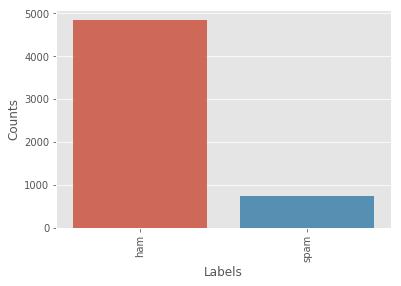

In [6]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

label_counts = df[0].value_counts()

sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Labels', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

## Part C: Feature Extraction

## Part D: Model Evaluation

# Logistic Regression: Multi-Class Classification

## Part A: Model Code

In [18]:
def one_hot_labels(Y):
    count = len(set(Y))
    categories = list(set(Y))
    result = []
    mapping = {}
    
    for i in range(count):
        z = set(Y)
        mapping[list(z)[i]] = i
    
    for i in range(len(Y)):
        z = Y[i]
        index = mapping[z]
        curr = [0] * count
        curr[index] = 1
        result.append(curr)
    return result

def softmax(score):
    return

def cross_entropy_loss(Y_one_hot, Y_proba):
    return

In [ ]:
class Softmax_Regression:
    def fit(self, X, Y, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0, early_stopping=False, validation_fraction=0.1, **kwargs):
        return
    
    def predict(self, X):
        return
    
    def __init__(self):
        return

## Part B: Exploratory Data Analysis [DONE]

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


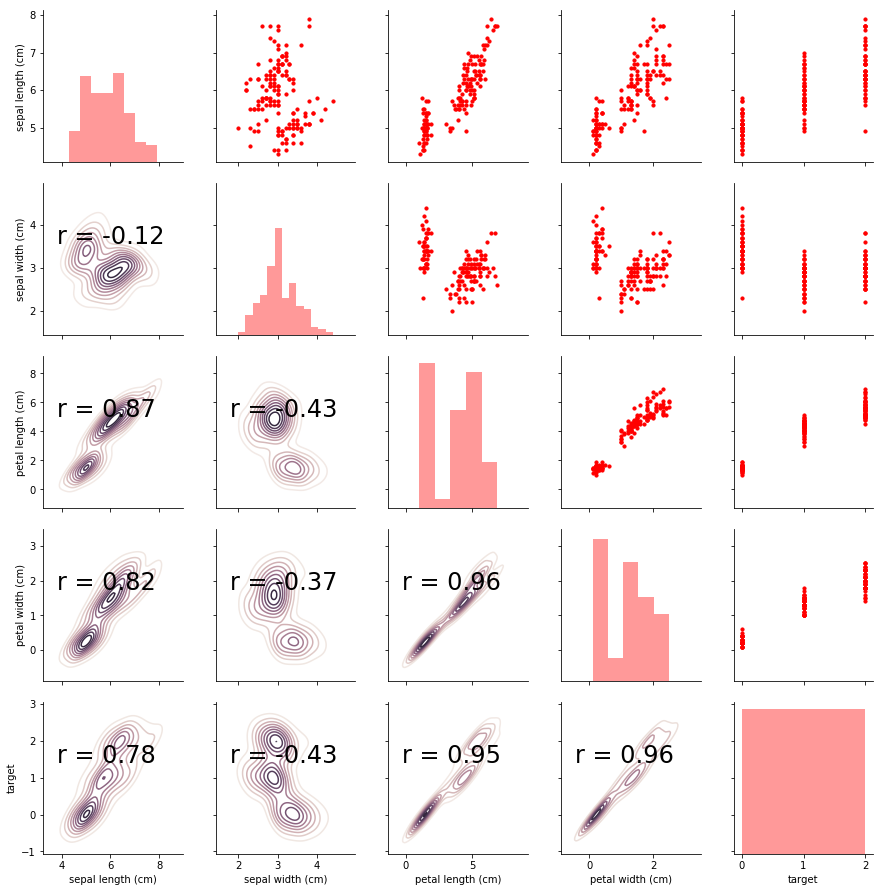

In [12]:
shuffle = df.sample(frac=1)

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(shuffle)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [13]:
def partition(X, y,t):
    X_test = X[:int(t*len(X))]
    y_test = y[:int(t*len(y))]
    X_train = X[int(t*len(X)):]
    y_train = y[int(t*len(y)):]
    
    return X_train, y_train, X_test, y_test

X = shuffle.drop(columns='target')
y = shuffle['target']
X_other = X
y_other = y

X = (X - X.min())/ (X.max() - X.min())
# X = (X - X.mean())/X.std()
# X.insert(0,'bias',0) # not sure if we need this?

X_train, y_train, X_test, y_test = partition(X, y, 0.2)

## Part C: Model Evaluation